In [1]:
import seaborn  as sns
import pandas as pd
ignore_list = [15, 20, 160, 198, 199, 200] # no station
ignore_list2 = [28, 47, 58, 69, 99, 101 ,106 ,153 , 168 ,185 ,190 ,229 ,239,240 ,264 ,306 ,311 ,313,346,378,382,383,387]
station_sno_list = set(range(1,405)) - set(ignore_list) - set(ignore_list2)
filepath = "E:/ubike_pred_db/csv_data/parsed_ubike_db_web_2021/"
train_start_date = '20200521 13:00:00'
train_end_date = '20210131 23:00:00'

In [2]:
data = pd.DataFrame()
for i in station_sno_list: 
    print('i:', i)
    ndf = pd.read_csv(filepath + "parsed_sno_"+str(i).zfill(3)+".csv")
    ndf['time'] = pd.to_datetime(ndf['time'], format='%Y/%m/%d %H%M%S', errors='ignore')
    ndf = ndf.set_index(pd.DatetimeIndex(ndf['time'])).drop(columns=['time'])
    ndf = ndf[train_start_date:train_end_date]
    data = data.append(ndf)


i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9
i: 10
i: 11
i: 12
i: 13
i: 14
i: 16
i: 17
i: 18
i: 19
i: 21
i: 22
i: 23
i: 24
i: 25
i: 26
i: 27
i: 29
i: 30
i: 31
i: 32
i: 33
i: 34
i: 35
i: 36
i: 37
i: 38
i: 39
i: 40
i: 41
i: 42
i: 43
i: 44
i: 45
i: 46
i: 48
i: 49
i: 50
i: 51
i: 52
i: 53
i: 54
i: 55
i: 56
i: 57
i: 59
i: 60
i: 61
i: 62
i: 63
i: 64
i: 65
i: 66
i: 67
i: 68
i: 70
i: 71
i: 72
i: 73
i: 74
i: 75
i: 76
i: 77
i: 78
i: 79
i: 80
i: 81
i: 82
i: 83
i: 84
i: 85
i: 86
i: 87
i: 88
i: 89
i: 90
i: 91
i: 92
i: 93
i: 94
i: 95
i: 96
i: 97
i: 98
i: 100
i: 102
i: 103
i: 104
i: 105
i: 107
i: 108
i: 109
i: 110
i: 111
i: 112
i: 113
i: 114
i: 115
i: 116
i: 117
i: 118
i: 119
i: 120
i: 121
i: 122
i: 123
i: 124
i: 125
i: 126
i: 127
i: 128
i: 129
i: 130
i: 131
i: 132
i: 133
i: 134
i: 135
i: 136
i: 137
i: 138
i: 139
i: 140
i: 141
i: 142
i: 143
i: 144
i: 145
i: 146
i: 147
i: 148
i: 149
i: 150
i: 151
i: 152
i: 154
i: 155
i: 156
i: 157
i: 158
i: 159
i: 161
i: 162
i: 163
i: 164
i: 165
i: 166
i: 167
i: 169
i:

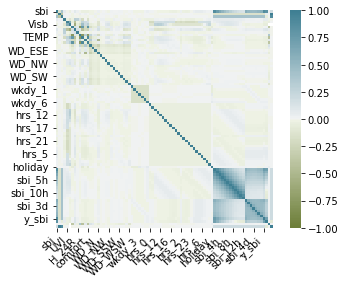

In [10]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(100, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
data = data.drop(columns=['Unnamed: 0', 'sno', 'cat_hospital_500', 'cat_college_500',
       'cat_train_500', 'cat_hospital_1000', 'cat_college_1000',
       'cat_train_1000'])

In [15]:
data = data.dropna()

In [18]:
data.columns

Index(['sbi', 'station_id', 'tot', 'PrecpHour', 'UVI', 'Visb', 'td', 'HUMD',
       'H_24R', 'PRES', 'TEMP', 'WDSE', 'comfort', 'WD_E', 'WD_ENE', 'WD_ESE',
       'WD_N', 'WD_NE', 'WD_NNE', 'WD_NNW', 'WD_NW', 'WD_S', 'WD_SE', 'WD_SSE',
       'WD_SSW', 'WD_SW', 'WD_W', 'WD_WNW', 'WD_WSW', 'wkdy_0', 'wkdy_1',
       'wkdy_2', 'wkdy_3', 'wkdy_4', 'wkdy_5', 'wkdy_6', 'hrs_0', 'hrs_1',
       'hrs_10', 'hrs_11', 'hrs_12', 'hrs_13', 'hrs_14', 'hrs_15', 'hrs_16',
       'hrs_17', 'hrs_18', 'hrs_19', 'hrs_2', 'hrs_20', 'hrs_21', 'hrs_22',
       'hrs_23', 'hrs_3', 'hrs_4', 'hrs_5', 'hrs_6', 'hrs_7', 'hrs_8', 'hrs_9',
       'holiday', 'sbi_1h', 'sbi_2h', 'sbi_3h', 'sbi_4h', 'sbi_5h', 'sbi_6h',
       'sbi_7h', 'sbi_8h', 'sbi_9h', 'sbi_10h', 'sbi_11h', 'sbi_12h', 'sbi_1d',
       'sbi_2d', 'sbi_3d', 'sbi_4d', 'sbi_5d', 'sbi_6d', 'sbi_7d', 'y_sbi',
       'percet'],
      dtype='object')

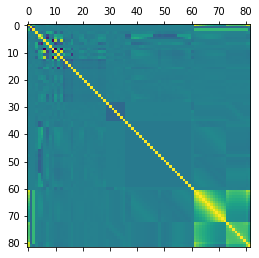

In [17]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

In [4]:
ndata = data.drop(columns=['sbi_1h', 'sbi_2h', 'sbi_3h', 'sbi_4h', 'sbi_5h', 'sbi_6h',
       'sbi_7h', 'sbi_8h', 'sbi_9h', 'sbi_10h', 'sbi_11h', 'sbi_12h', 'sbi_1d',
       'sbi_2d', 'sbi_3d', 'sbi_4d', 'sbi_5d', 'sbi_6d', 'sbi_7d','sbi',
       'percet'])

In [19]:
wdata = ndata[['y_sbi','PrecpHour', 'UVI', 'Visb', 'td', 'HUMD', 'H_24R','PRES', 'TEMP', 'WDSE', 'comfort']]

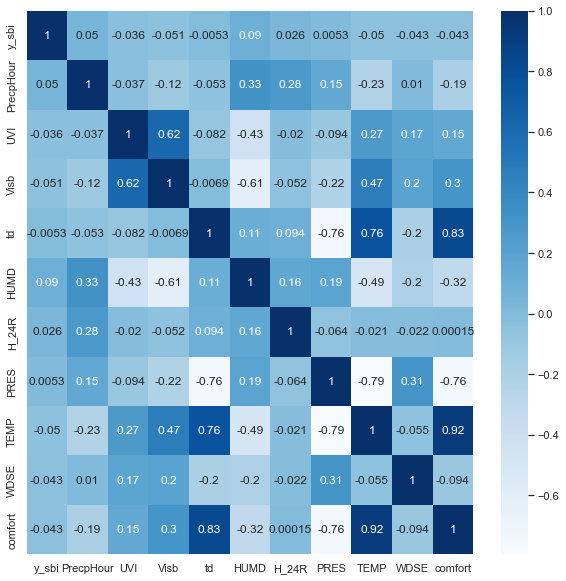

In [20]:
corr = wdata.corr()
sns.set(font_scale=1.2)
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={"size": 12},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [21]:
w2data = ndata[['y_sbi','PrecpHour', 'UVI', 'td', 'HUMD', 'H_24R','PRES', 'TEMP', 'WDSE', 'comfort']]

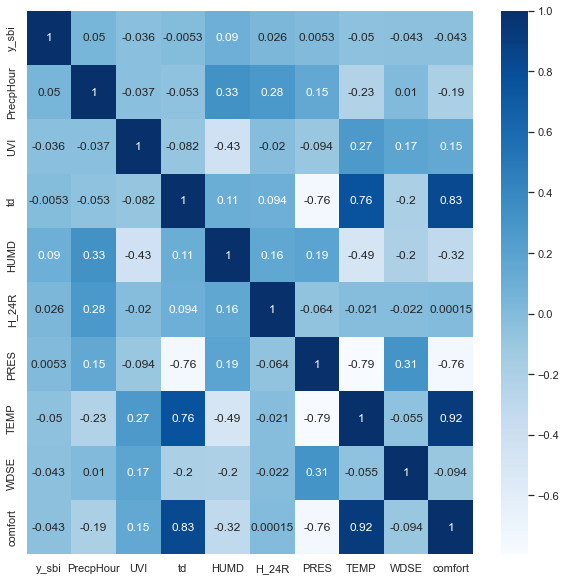

In [22]:
corr = w2data.corr()
sns.set(font_scale=1.2)
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={"size": 12},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [40]:
hdata = ndata[['y_sbi','WD_E', 'WD_ENE', 'WD_ESE',
       'WD_N', 'WD_NE', 'WD_NNE', 'WD_NNW', 'WD_NW', 'WD_S', 'WD_SE', 'WD_SSE',
       'WD_SSW', 'WD_SW', 'WD_W', 'WD_WNW', 'WD_WSW','WDSE']] 
    

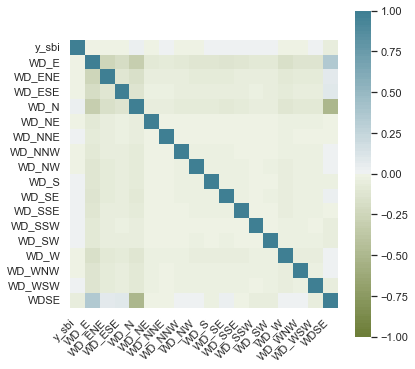

In [41]:
corr = hdata.corr()
sns.set(rc={"figure.figsize": (6, 6)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(100, 220, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
h2data = ndata[['y_sbi','wkdy_0', 'wkdy_1',
       'wkdy_2', 'wkdy_3', 'wkdy_4', 'wkdy_5', 'wkdy_6','holiday']] 
h3data = ndata[['y_sbi','hrs_0', 'hrs_1',
       'hrs_10', 'hrs_11', 'hrs_12', 'hrs_13', 'hrs_14', 'hrs_15', 'hrs_16',
       'hrs_17', 'hrs_18', 'hrs_19', 'hrs_2', 'hrs_20', 'hrs_21', 'hrs_22',
       'hrs_23', 'hrs_3', 'hrs_4', 'hrs_5', 'hrs_6', 'hrs_7', 'hrs_8', 'hrs_9']] 
sdata = data[['y_sbi','sbi','sbi_1h', 'sbi_2h', 'sbi_3h', 'sbi_4h', 'sbi_5h', 'sbi_6h',
       'sbi_7h', 'sbi_8h', 'sbi_9h', 'sbi_10h', 'sbi_11h', 'sbi_12h', 'sbi_1d',
       'sbi_2d', 'sbi_3d', 'sbi_4d', 'sbi_5d', 'sbi_6d', 'sbi_7d']] 

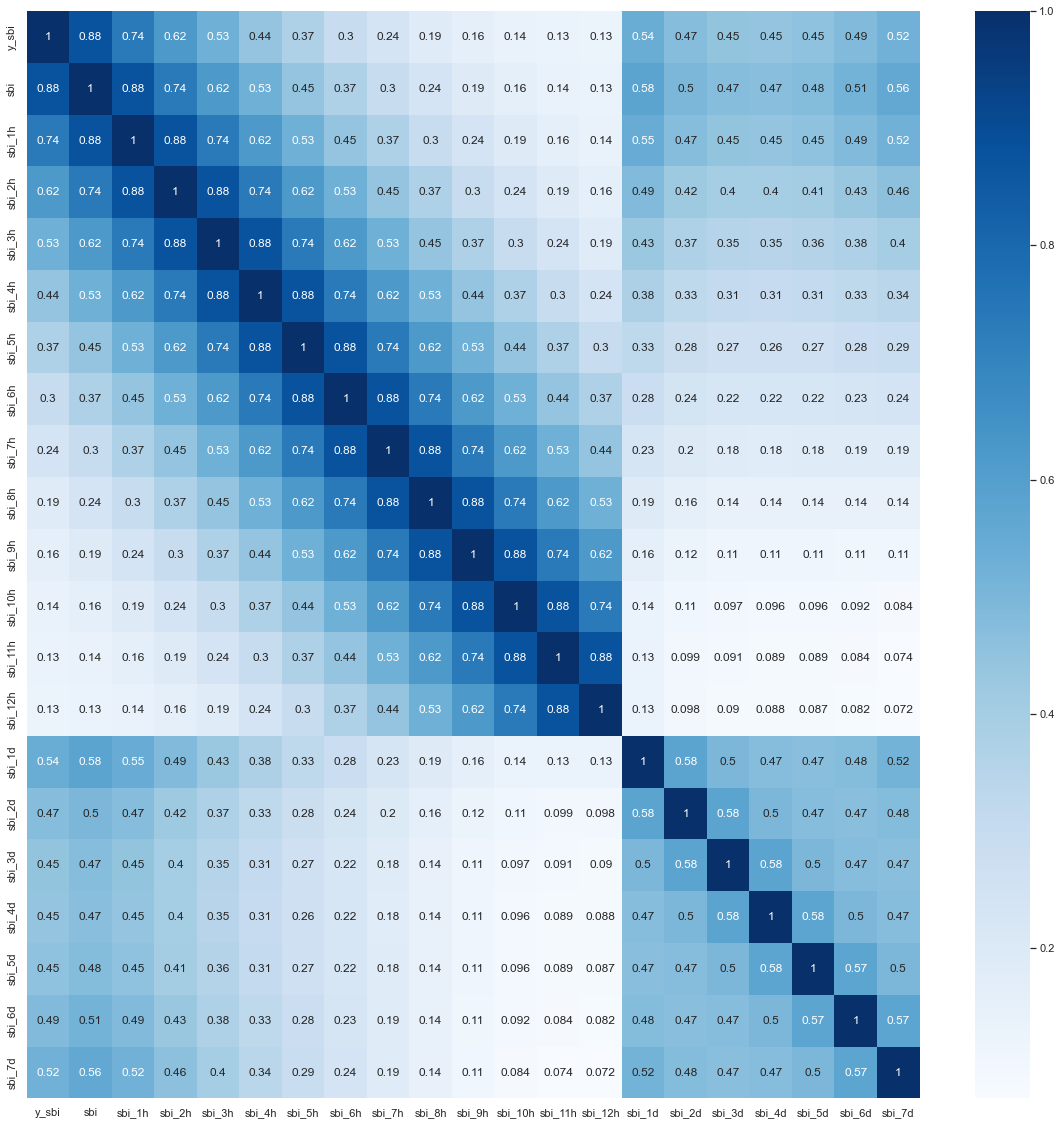

In [10]:
corr = sdata.corr()
sns.set(font_scale=1.2)
sns.set(rc={"figure.figsize": (20, 20)})
sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={"size": 12},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

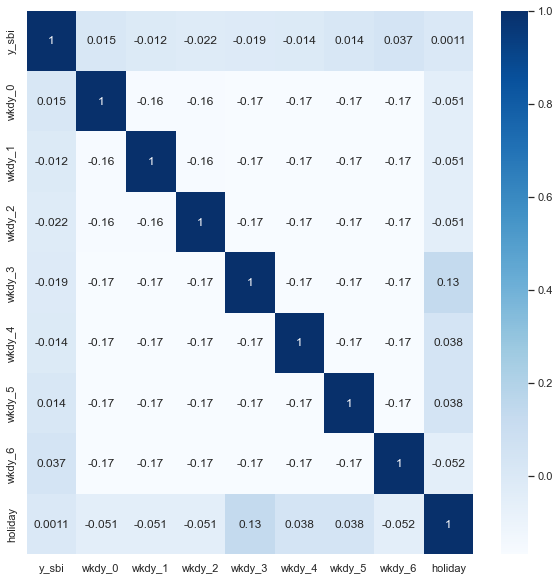

In [14]:
corr = h2data.corr()
sns.set(font_scale=1.2)
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={"size": 12},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

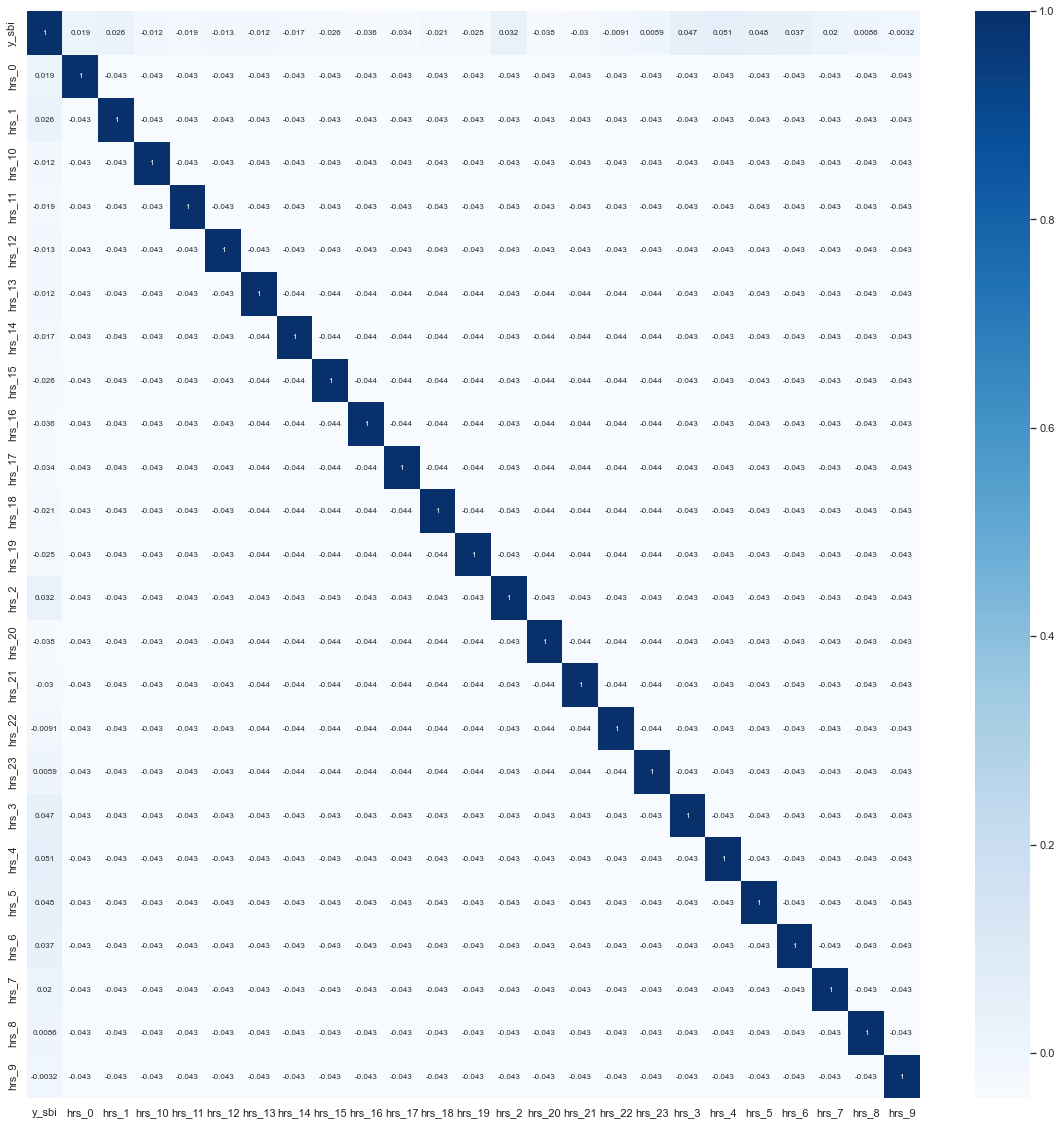

In [16]:
corr = h3data.corr()
sns.set(font_scale=1.2)
sns.set(rc={"figure.figsize": (20, 20)})
sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={"size": 8},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [23]:
cdf = data.corr()

KeyboardInterrupt: 

In [24]:
cdf = data.corr()
cdf.to_csv("csv/correlation_all.csv")

In [28]:
ncc = cdf['y_sbi']
ncc = ncc[['sbi','PrecpHour', 'UVI', 'td', 'HUMD',
       'H_24R', 'PRES', 'TEMP', 'WDSE', 'comfort', 'wkdy_0', 'wkdy_1',
       'wkdy_2', 'wkdy_3', 'wkdy_4', 'wkdy_5', 'wkdy_6', 'hrs_0', 'hrs_1',
       'hrs_10', 'hrs_11', 'hrs_12', 'hrs_13', 'hrs_14', 'hrs_15', 'hrs_16',
       'hrs_17', 'hrs_18', 'hrs_19', 'hrs_2', 'hrs_20', 'hrs_21', 'hrs_22',
       'hrs_23', 'hrs_3', 'hrs_4', 'hrs_5', 'hrs_6', 'hrs_7', 'hrs_8', 'hrs_9',
       'holiday', 'sbi_1h', 'sbi_2h', 'sbi_3h', 'sbi_4h', 'sbi_5h', 'sbi_6h',
       'sbi_7h', 'sbi_8h', 'sbi_9h', 'sbi_10h', 'sbi_11h', 'sbi_12h', 'sbi_1d',
       'sbi_2d', 'sbi_3d', 'sbi_4d', 'sbi_5d', 'sbi_6d', 'sbi_7d']]

In [30]:
ncc.describe()

count    61.000000
mean      0.134817
std       0.228650
min      -0.050335
25%      -0.014031
50%       0.019744
75%       0.187713
max       0.879703
Name: y_sbi, dtype: float64

In [31]:
nnn = pd.read_csv("csv/correlation_all.csv")

In [32]:
nnn

,Unnamed: 0,sbi,station_id,tot,PrecpHour,UVI,Visb,td,HUMD,H_24R,...,sbi_2d,sbi_3d,sbi_4d,sbi_5d,sbi_6d,sbi_7d,y_sbi,percet,Unnamed: 0.1,sno
0,sbi,1.000000,-1.540549e-01,4.157344e-01,5.357631e-02,-8.641862e-04,-0.029776,-9.861908e-03,7.964943e-02,2.532575e-02,...,0.497640,0.472557,0.469398,0.478008,0.514396,0.559437,0.879703,0.825521,5.153867e-02,1.749888e-01
1,station_id,-0.154055,1.000000e+00,-3.962592e-01,1.380696e-02,1.376095e-03,0.000181,-1.007411e-02,1.306308e-03,-2.323976e-03,...,-0.153684,-0.153717,-0.153703,-0.153801,-0.153681,-0.153619,-0.154034,0.043686,-2.047380e-15,1.000000e+00
2,tot,0.415734,-3.962592e-01,1.000000e+00,1.155984e-02,9.371840e-04,-0.000318,-9.819714e-03,-2.403629e-03,-1.871957e-04,...,0.415489,0.415396,0.415431,0.415691,0.415471,0.415625,0.415674,-0.069755,-5.160154e-16,8.780541e-01
3,PrecpHour,0.053576,1.380696e-02,1.155984e-02,1.000000e+00,-3.655400e-02,-0.117042,-5.278690e-02,3.265268e-01,2.779875e-01,...,0.007178,0.003935,0.005934,0.005120,0.000081,0.007216,0.050272,0.050317,4.249452e-02,9.560886e-16
4,UVI,-0.000864,1.376095e-03,9.371840e-04,-3.655400e-02,1.000000e+00,0.620169,-8.205877e-02,-4.288833e-01,-1.983382e-02,...,0.010326,0.011568,0.011097,0.011188,0.013558,0.011808,-0.035531,-0.021969,-6.224832e-02,-6.097569e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,sbi_7d,0.559437,-1.536188e-01,4.156247e-01,7.215639e-03,1.180838e-02,-0.012751,-1.675928e-02,3.278615e-02,2.607816e-03,...,0.478698,0.469184,0.472217,0.496321,0.574320,1.000000,0.524073,0.357449,5.512527e-02,1.738837e-01
80,y_sbi,0.879703,-1.540339e-01,4.156736e-01,5.027228e-02,-3.553127e-02,-0.050819,-5.279693e-03,9.015320e-02,2.640231e-02,...,0.470820,0.448299,0.445165,0.452997,0.485125,0.524073,1.000000,0.693557,5.153988e-02,1.749454e-01
81,percet,0.825521,4.368590e-02,-6.975502e-02,5.031655e-02,-2.196900e-02,-0.048456,1.042048e-04,1.055002e-01,2.745390e-02,...,0.299272,0.278240,0.274227,0.280393,0.313235,0.357449,0.693557,1.000000,5.079675e-02,-1.142999e-01
82,Unnamed: 0,0.051539,-2.047380e-15,-5.160154e-16,4.249452e-02,-6.224832e-02,NaN,-7.567946e-01,1.282184e-01,-7.111704e-02,...,0.051987,0.050144,0.048901,0.049192,0.052656,0.055125,0.051540,0.050797,1.000000e+00,-2.077712e-15


In [33]:
data.columns

Index(['sbi', 'station_id', 'tot', 'PrecpHour', 'UVI', 'Visb', 'td', 'HUMD',
       'H_24R', 'PRES', 'TEMP', 'WDSE', 'comfort', 'WD_E', 'WD_ENE', 'WD_ESE',
       'WD_N', 'WD_NE', 'WD_NNE', 'WD_NNW', 'WD_NW', 'WD_S', 'WD_SE', 'WD_SSE',
       'WD_SSW', 'WD_SW', 'WD_W', 'WD_WNW', 'WD_WSW', 'wkdy_0', 'wkdy_1',
       'wkdy_2', 'wkdy_3', 'wkdy_4', 'wkdy_5', 'wkdy_6', 'hrs_0', 'hrs_1',
       'hrs_10', 'hrs_11', 'hrs_12', 'hrs_13', 'hrs_14', 'hrs_15', 'hrs_16',
       'hrs_17', 'hrs_18', 'hrs_19', 'hrs_2', 'hrs_20', 'hrs_21', 'hrs_22',
       'hrs_23', 'hrs_3', 'hrs_4', 'hrs_5', 'hrs_6', 'hrs_7', 'hrs_8', 'hrs_9',
       'holiday', 'sbi_1h', 'sbi_2h', 'sbi_3h', 'sbi_4h', 'sbi_5h', 'sbi_6h',
       'sbi_7h', 'sbi_8h', 'sbi_9h', 'sbi_10h', 'sbi_11h', 'sbi_12h', 'sbi_1d',
       'sbi_2d', 'sbi_3d', 'sbi_4d', 'sbi_5d', 'sbi_6d', 'sbi_7d', 'y_sbi',
       'percet', 'Unnamed: 0', 'sno', 'cat_hospital_500', 'cat_college_500',
       'cat_train_500', 'cat_hospital_1000', 'cat_college_1000',
      

In [43]:
nndata = data[['sbi','PrecpHour', 'UVI', 'td', 'HUMD',
       'H_24R', 'PRES', 'TEMP', 'WDSE', 'comfort', 'WD_E', 'WD_ENE', 'WD_ESE',
       'WD_N', 'WD_NE', 'WD_NNE', 'WD_NNW', 'WD_NW', 'WD_S', 'WD_SE', 'WD_SSE',
       'WD_SSW', 'WD_SW', 'WD_W', 'WD_WNW', 'WD_WSW', 'wkdy_0', 'wkdy_1',
       'wkdy_2', 'wkdy_3', 'wkdy_4', 'wkdy_5', 'wkdy_6', 'hrs_0', 'hrs_1',
       'hrs_10', 'hrs_11', 'hrs_12', 'hrs_13', 'hrs_14', 'hrs_15', 'hrs_16',
       'hrs_17', 'hrs_18', 'hrs_19', 'hrs_2', 'hrs_20', 'hrs_21', 'hrs_22',
       'hrs_23', 'hrs_3', 'hrs_4', 'hrs_5', 'hrs_6', 'hrs_7', 'hrs_8', 'hrs_9',
       'holiday', 'sbi_1h', 'sbi_2h', 'sbi_3h', 'sbi_4h', 'sbi_5h', 'sbi_6h',
       'sbi_7h', 'sbi_8h', 'sbi_9h', 'sbi_10h', 'sbi_11h', 'sbi_12h', 'sbi_1d',
       'sbi_2d', 'sbi_3d', 'sbi_4d', 'sbi_5d', 'sbi_6d', 'sbi_7d', 'y_sbi', 'cat_hospital_500', 'cat_college_500',
       'cat_train_500', 'cat_hospital_1000', 'cat_college_1000',
       'cat_train_1000']]

In [44]:
nndata_corr=nndata.corr()

In [45]:
nndata_corr.to_csv("csv/correlation_all.csv")

In [38]:
nnn = pd.read_csv("csv/correlation_all.csv")

In [40]:
nnn = nnn.set_index("Unnamed: 0")

In [42]:
nnn[nnn.index=='y_sbi']

,sbi,tot,PrecpHour,UVI,Visb,td,HUMD,H_24R,PRES,TEMP,...,sbi_11h,sbi_12h,sbi_1d,sbi_2d,sbi_3d,sbi_4d,sbi_5d,sbi_6d,sbi_7d,y_sbi
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
y_sbi,0.879703,0.415674,0.050272,-0.035531,-0.050819,-0.00528,0.090153,0.026402,0.005272,-0.050335,...,0.131045,0.129613,0.542456,0.47082,0.448299,0.445165,0.452997,0.485125,0.524073,1.0


In [8]:
from lasso_model import lasso
dd = data.dropna()
final_drop_list =  ['y_sbi'] 
train_x = dd.drop(columns = final_drop_list)
train_y = dd[['y_sbi']]

train_x_wo_t = train_x.reset_index().drop(columns=['time'])
train_y_wo_t = train_y.reset_index().drop(columns=['time'])

In [16]:
lasso_model, results, best_param, indexing = lasso(train_x_wo_t, train_y_wo_t,rfecv_en=False)
   
label_name = train_x_wo_t.columns  
coef_lab = pd.DataFrame(lasso_model.coef_,index=label_name,columns=[sno])
c = 0.001
features = coef_lab[coef_lab.abs() > c].dropna().index
print('c:',c)
print('n of feature:',len(features))
print(features)          
train_x_wo_t = train_x_wo_t[features]

UnboundLocalError: local variable 'train_index' referenced before assignment